In [1]:
!pip install pmdarima


In [2]:
import time
import datetime
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# for interactive visualizations
#!pip install plotly
import plotly
import plotly.offline as py
import plotly.graph_objs as go


#from bubbly.bubbly import bubbleplot

#from pandas_visual_analysis import VisualAnalysis
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_classif


import warnings
warnings.filterwarnings('ignore')
from math import sqrt
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg

import pmdarima as pm

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pandas.tseries.offsets import DateOffset


In [3]:
ticker = 'RELIANCE.NS'
period1 = int(time.mktime(datetime.datetime(2015, 12, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2022, 12, 31, 23, 59).timetuple()))
interval = '1d' # 1d, 1m

query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

df = pd.read_csv(query_string)
# print(df)
df.to_csv('RELIANCE.NS.csv')

In [4]:
Reliance=df.drop(["Adj Close"],axis=1).reset_index(drop=True)
Reliance.head()

,Date,Open,High,Low,Close,Volume
0,2015-12-01,477.474030,484.804535,476.111938,478.415100,5990904
1,2015-12-02,478.588470,485.250305,477.721680,484.383514,3495228
2,2015-12-03,482.872833,489.831879,482.476593,484.012054,5243282
3,2015-12-04,481.585052,483.516754,476.186218,478.192230,6204259
4,2015-12-07,478.192230,481.931763,470.415924,471.555115,6684321


In [5]:
Reliance['Date']=pd.to_datetime(Reliance['Date'],format='%Y-%m-%d')
Reliance.head()

,Date,Open,High,Low,Close,Volume
0,2015-12-01,477.474030,484.804535,476.111938,478.415100,5990904
1,2015-12-02,478.588470,485.250305,477.721680,484.383514,3495228
2,2015-12-03,482.872833,489.831879,482.476593,484.012054,5243282
3,2015-12-04,481.585052,483.516754,476.186218,478.192230,6204259
4,2015-12-07,478.192230,481.931763,470.415924,471.555115,6684321


In [6]:
Reliance4 = Reliance.copy()
Reliance4 = Reliance4.set_index(['Date'])
Reliance4.head()


,Open,High,Low,Close,Volume
Date,,,,,
2015-12-01,477.474030,484.804535,476.111938,478.415100,5990904
2015-12-02,478.588470,485.250305,477.721680,484.383514,3495228
2015-12-03,482.872833,489.831879,482.476593,484.012054,5243282
2015-12-04,481.585052,483.516754,476.186218,478.192230,6204259
2015-12-07,478.192230,481.931763,470.415924,471.555115,6684321


# Univariate Analysis

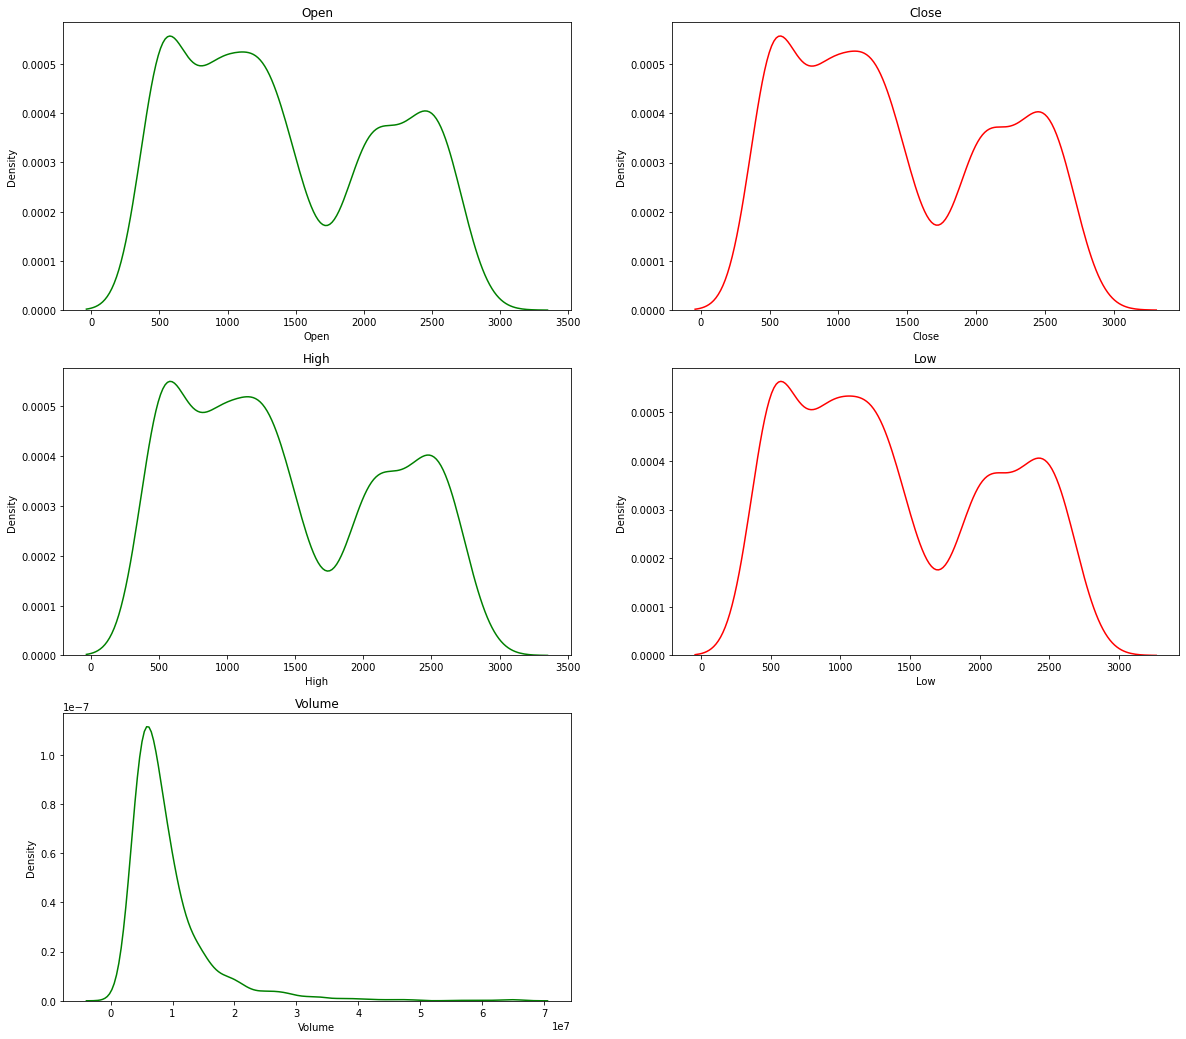

In [8]:
plt.figure(figsize = (20,18))

plt.subplot(3,2,1)
sns.kdeplot(Reliance4['Open'], color = 'green')
plt.title('Open')

plt.subplot(3,2,2)
sns.kdeplot(Reliance4['Close'], color = 'red')
plt.title('Close')

plt.subplot(3,2,3)
sns.kdeplot(Reliance4['High'], color = 'green')
plt.title('High')

plt.subplot(3,2,4)
sns.kdeplot(Reliance4['Low'], color = 'red')
plt.title('Low')

plt.subplot(3,2,5)
sns.kdeplot(Reliance4['Volume'], color = 'green')
plt.title('Volume')

plt.show()

Text(0.5, 1.0, 'Low')

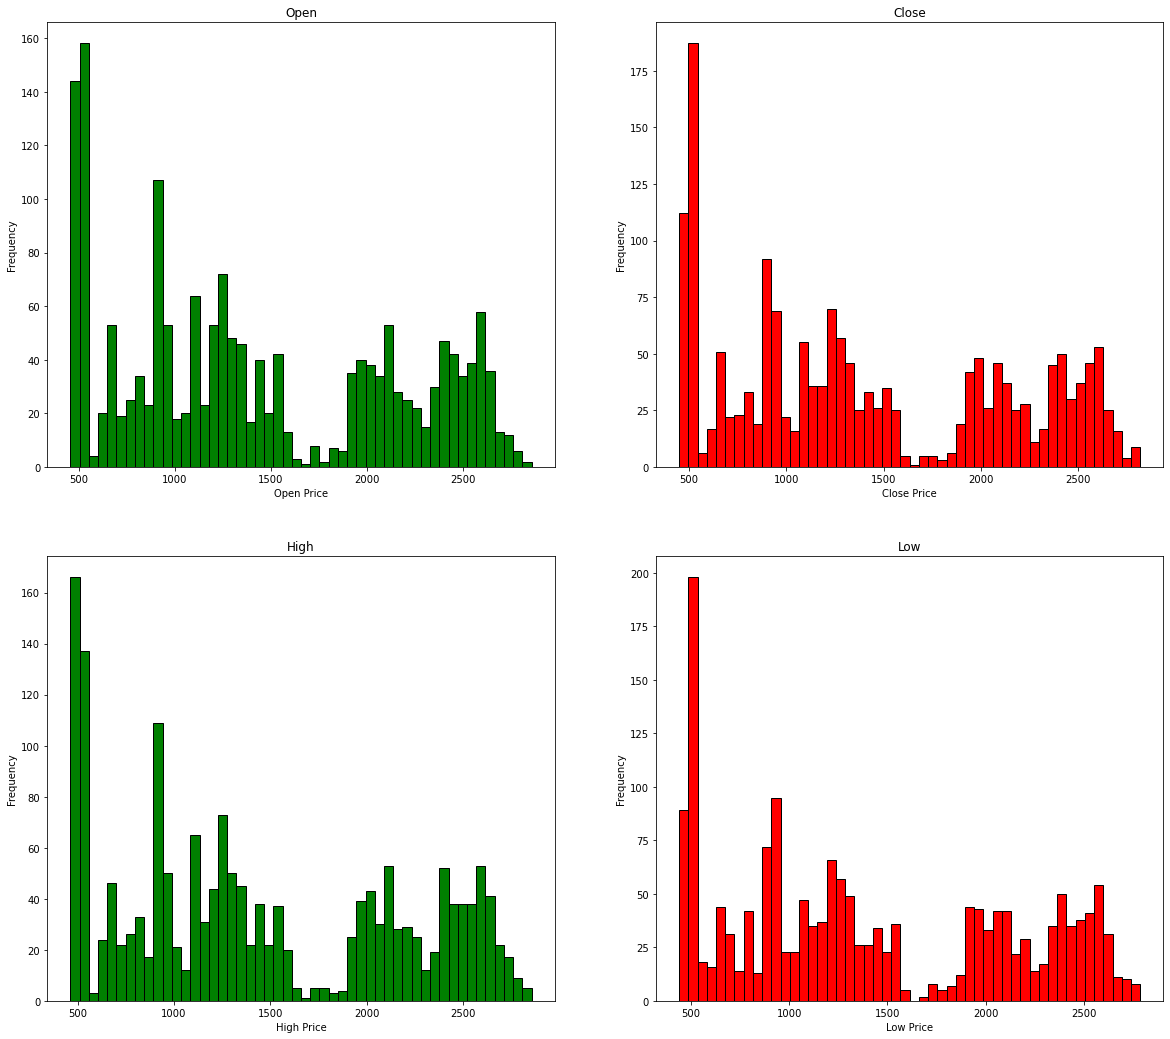

In [9]:
# Ploting Histogram
plt.figure(figsize=(20,18))
#Plot 1
plt.subplot(2,2,1)
plt.hist(Reliance4['Open'],bins=50, color='green', edgecolor='black')
plt.xlabel("Open Price")
plt.ylabel("Frequency")
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.hist(Reliance4['Close'],bins=50, color='red', edgecolor='black')
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.hist(Reliance4['High'],bins=50, color='green', edgecolor='black')
plt.xlabel("High Price")
plt.ylabel("Frequency")
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.hist(Reliance4['Low'],bins=50, color='red', edgecolor='black')
plt.xlabel("Low Price")
plt.ylabel("Frequency")
plt.title('Low')

Text(0.5, 1.0, 'Volume')

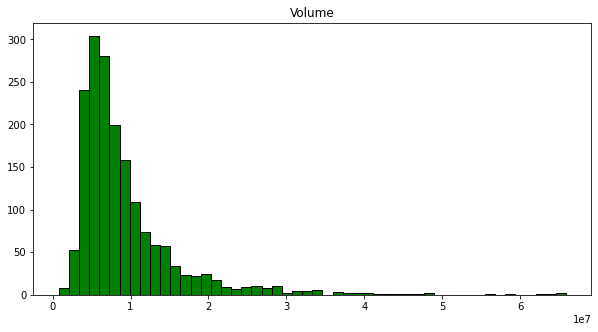

In [10]:
plt.figure(figsize = (10,5))
plt.hist(Reliance4['Volume'], bins=50, color = 'green',edgecolor='black')
plt.title('Volume')

Text(0.5, 1.0, 'Low')

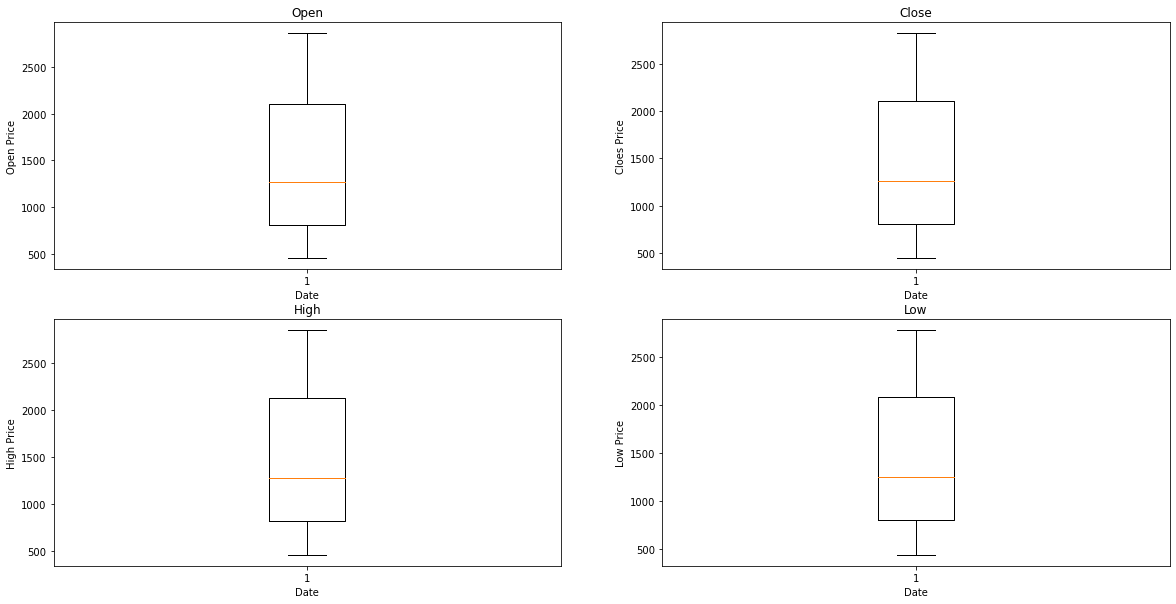

In [11]:
# Creating box-plots
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.boxplot(Reliance4['Open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.boxplot(Reliance4['Close'])
plt.xlabel('Date')
plt.ylabel('Cloes Price')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.boxplot(Reliance4['High'])
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.boxplot(Reliance4['Low'])
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low')

so, from the boxplots we can see that there are no outliers in those columns

<AxesSubplot:xlabel='Date'>

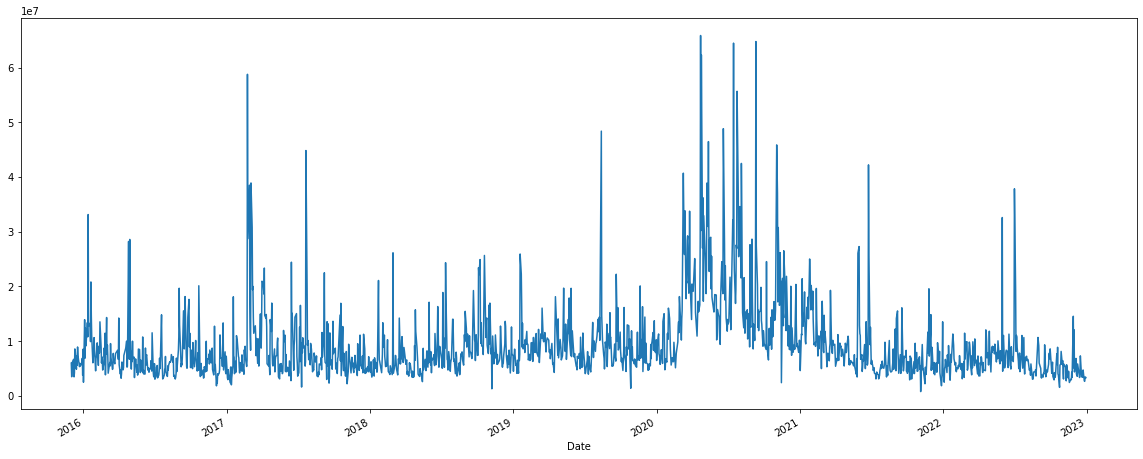

In [12]:
Reliance4['Volume'].plot(figsize = (20,8))

In [13]:
ma100 = Reliance4.Close.rolling(30).mean()

In [14]:
ma100

Date
2015-12-01            NaN
2015-12-02            NaN
2015-12-03            NaN
2015-12-04            NaN
2015-12-07            NaN
                 ...     
2022-12-26    2618.376693
2022-12-27    2616.290023
2022-12-28    2614.693351
2022-12-29    2612.835018
2022-12-30    2611.153353
Name: Close, Length: 1752, dtype: float64

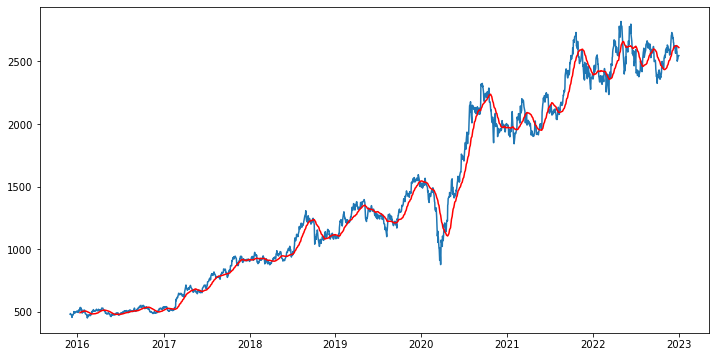

In [15]:
plt.figure(figsize=(12,6))
plt.plot(Reliance4['Close'])
plt.plot(ma100,'r')

In [16]:
ma200 = Reliance4.Close.rolling(200).mean()

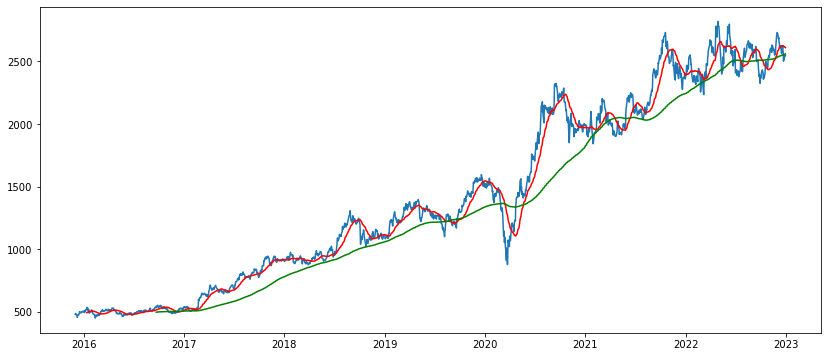

In [18]:
plt.figure(figsize=(14,6))
plt.plot(Reliance4['Close'])
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [19]:
Reliance['Year'] = Reliance.Date.dt.strftime('%Y')
Reliance['Month'] = Reliance.Date.dt.strftime('%b')

In [20]:
groupby_year = Reliance.groupby(['Year']).sum()
groupby_year

,Open,High,Low,Close,Volume
Year,,,,,
2015,10635.387116,10769.589996,10563.320253,10668.151582,133941578
2016,123588.132837,124844.771303,122394.621372,123522.629237,1797599345
2017,181744.766535,183634.156557,179920.730742,181682.407505,2123267904
2018,253713.053534,256495.826104,250796.845763,253727.664987,1962602070
2019,318531.837645,321823.930542,314887.629762,318204.390390,2207733022
2020,437723.935793,444033.036256,430628.035595,436838.726682,4478602335
2021,546274.100343,551954.347768,539834.102791,545529.450444,2061214352
2022,626811.348873,633958.098138,620371.703136,627139.902597,1587096560


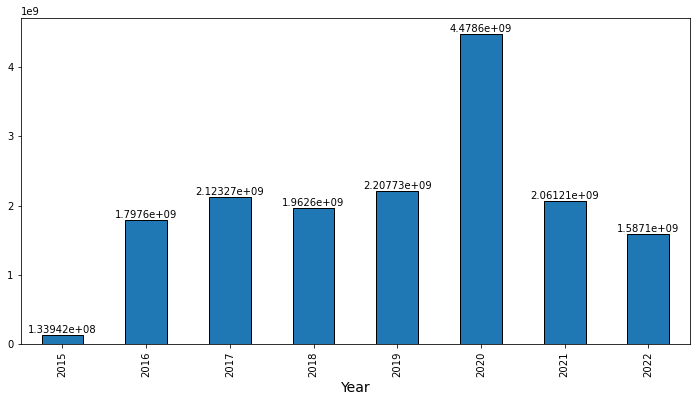

In [21]:
ax = groupby_year['Volume'].plot(kind = 'bar', figsize = (12,6), edgecolor = 'black')
plt.xlabel('Year', fontsize = 14)

for i in ax.containers :
    ax.bar_label(i,)

Text(0.5, 1.0, 'Volume')

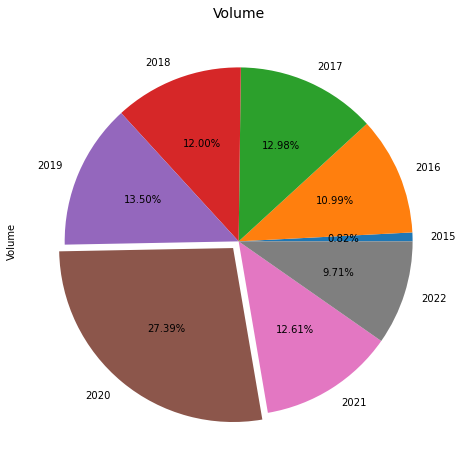

In [22]:
groupby_year['Volume'].plot(kind = 'pie', figsize = (8,8), explode=[0,0,0,0,0,0.05,0,0], autopct='%1.2f%%')
plt.title('Volume', fontsize = 14)

<AxesSubplot:xlabel='Year'>

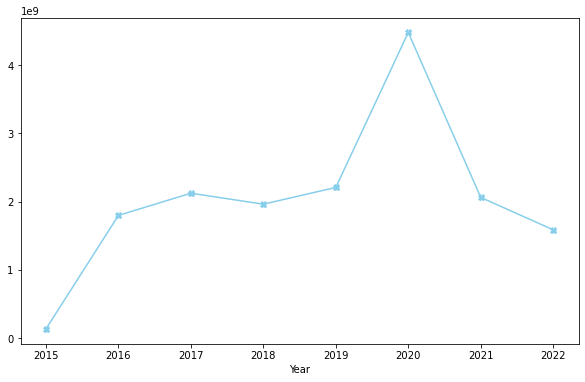

In [23]:
groupby_year['Volume'].plot(figsize = (10,6), color = 'Skyblue', marker = 'X')

In [24]:
groupby_year_month = Reliance.groupby(['Year','Month']).sum()
groupby_year_month

Open          High           Low         Close     Volume
Year Month                                                                   
2015 Dec    10635.387116  10769.589996  10563.320253  10668.151582  133941578
2016 Apr     9234.367310   9307.003785   9130.006620   9198.977936  161217673
     Aug    11123.460754  11233.740357  11025.613191  11133.168639  124825078
     Dec    11280.744841  11415.566896  11240.848023  11332.751952  133214854
     Feb    10012.863065  10139.017179   9837.797452   9960.162627  165289727
...                  ...           ...           ...           ...        ...
2022 Mar    51291.749755  52088.299804  50841.050539  51654.750000  145025237
     May    54031.849608  54794.899902  53247.350098  53897.299804  186328537
     Nov    54550.449951  55032.349608  53998.150392  54674.500490  104414767
     Oct    46237.549804  46759.050049  45872.550049  46304.000245   94498167
     Sep    55219.399902  55762.599853  54742.050294  55111.800294  118852012

[85 rows x 5 columns]

In [25]:
Reliance.pivot_table(index = 'Year', columns = 'Month', values = 'Volume')

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
2015,NaN,NaN,6.088254e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,8.956537e+06,5.673867e+06,6.055221e+06,7.870939e+06,1.202302e+07,5.360442e+06,5.479072e+06,7.174074e+06,6.258841e+06,6.289788e+06,6.896174e+06,1.037252e+07
2017,1.159898e+07,6.181661e+06,6.101047e+06,1.223297e+07,5.955537e+06,1.066957e+07,8.137746e+06,1.375012e+07,6.735631e+06,6.004017e+06,7.559944e+06,8.391921e+06
2018,6.052114e+06,7.153030e+06,7.709132e+06,7.700547e+06,6.062520e+06,9.143965e+06,7.767146e+06,7.056082e+06,5.823331e+06,8.261655e+06,1.324279e+07,1.009098e+07
2019,8.869954e+06,1.206854e+07,8.242539e+06,8.896759e+06,9.381525e+06,6.933854e+06,7.081179e+06,1.003799e+07,1.125124e+07,8.431208e+06,8.291454e+06,9.644254e+06
2020,2.656922e+07,1.825029e+07,1.058042e+07,9.178678e+06,8.771037e+06,2.680595e+07,1.807603e+07,2.186997e+07,2.441626e+07,2.161127e+07,1.237273e+07,1.721645e+07
2021,7.947022e+06,6.199043e+06,5.746993e+06,1.205633e+07,1.500253e+07,4.734037e+06,1.056327e+07,9.244433e+06,8.638688e+06,7.412521e+06,5.394351e+06,7.230086e+06
2022,7.168894e+06,5.427309e+06,4.150298e+06,5.794175e+06,6.335538e+06,9.381524e+06,7.377721e+06,6.905964e+06,8.872787e+06,4.972132e+06,4.973588e+06,5.402364e+06


In [26]:
Reliance['Daily_Gain'] = Reliance['Close'].pct_change(periods = 1)
Reliance

,Date,Open,High,Low,Close,Volume,Year,Month,Daily_Gain
0,2015-12-01,477.474030,484.804535,476.111938,478.415100,5990904,2015,Dec,NaN
1,2015-12-02,478.588470,485.250305,477.721680,484.383514,3495228,2015,Dec,0.012475
2,2015-12-03,482.872833,489.831879,482.476593,484.012054,5243282,2015,Dec,-0.000767
3,2015-12-04,481.585052,483.516754,476.186218,478.192230,6204259,2015,Dec,-0.012024
4,2015-12-07,478.192230,481.931763,470.415924,471.555115,6684321,2015,Dec,-0.013880
...,...,...,...,...,...,...,...,...,...
1747,2022-12-26,2514.750000,2542.000000,2492.399902,2524.050049,2764496,2022,Dec,0.008732
1748,2022-12-27,2530.000000,2548.800049,2515.250000,2544.699951,2659749,2022,Dec,0.008181
1749,2022-12-28,2538.000000,2549.800049,2521.500000,2544.449951,3442509,2022,Dec,-0.000098
1750,2022-12-29,2527.000000,2548.899902,2525.500000,2543.300049,3198493,2022,Dec,-0.000452


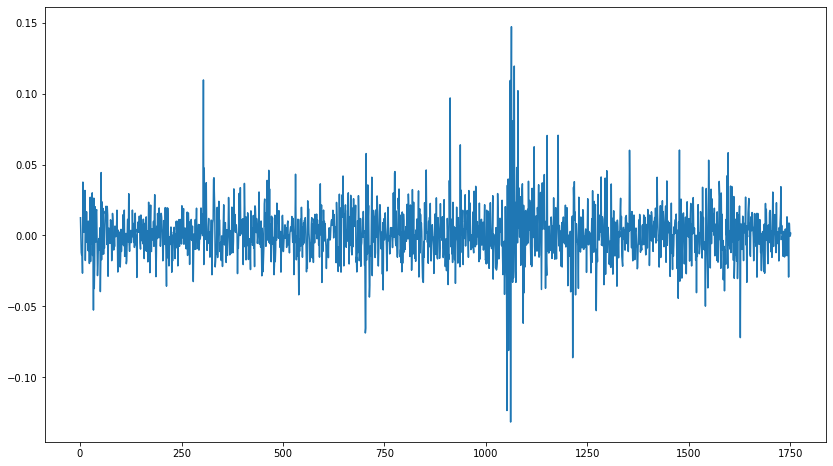

In [27]:
plt.figure(figsize = (14,8))
plt.plot(Reliance.index,Reliance['Daily_Gain'])
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Open'>

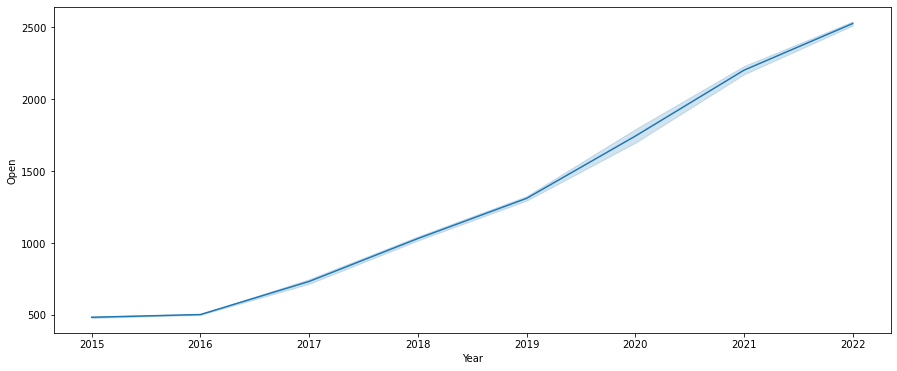

In [28]:
plt.figure(figsize = (15,6))
sns.lineplot(x = Reliance['Year'], y = Reliance['Open'])

In [29]:
Reliance1=Reliance.copy()
Reliance1.head()

,Date,Open,High,Low,Close,Volume,Year,Month,Daily_Gain
0,2015-12-01,477.474030,484.804535,476.111938,478.415100,5990904,2015,Dec,NaN
1,2015-12-02,478.588470,485.250305,477.721680,484.383514,3495228,2015,Dec,0.012475
2,2015-12-03,482.872833,489.831879,482.476593,484.012054,5243282,2015,Dec,-0.000767
3,2015-12-04,481.585052,483.516754,476.186218,478.192230,6204259,2015,Dec,-0.012024
4,2015-12-07,478.192230,481.931763,470.415924,471.555115,6684321,2015,Dec,-0.013880


In [30]:
ReliancePivot= pd.pivot_table(Reliance1, values = "Close", columns = "Year", index = "Month")
ReliancePivot.head()

Year,2015,2016,2017,2018,2019,2020,2021,2022
Month,,,,,,,,
Apr,NaN,511.054330,690.166253,926.411394,1349.067447,1259.761481,1961.278956,2672.586863
Aug,NaN,506.053120,784.630345,1217.365345,1216.392322,2110.792899,2153.309512,2610.795007
Dec,484.915981,515.125089,910.841131,1110.728894,1548.179565,1978.338645,2388.458698,2605.172741
Feb,NaN,474.293458,536.810259,913.715210,1238.051359,1427.307386,2011.252509,2367.997498
Jan,NaN,507.806502,523.760280,931.562897,1149.163606,1502.899679,1957.662494,2451.782544


<AxesSubplot:xlabel='Month'>

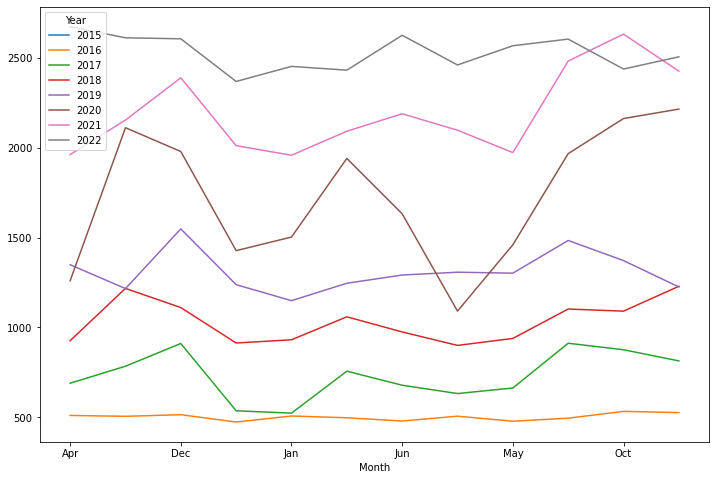

In [33]:
 ReliancePivot.plot(figsize = (12,8))

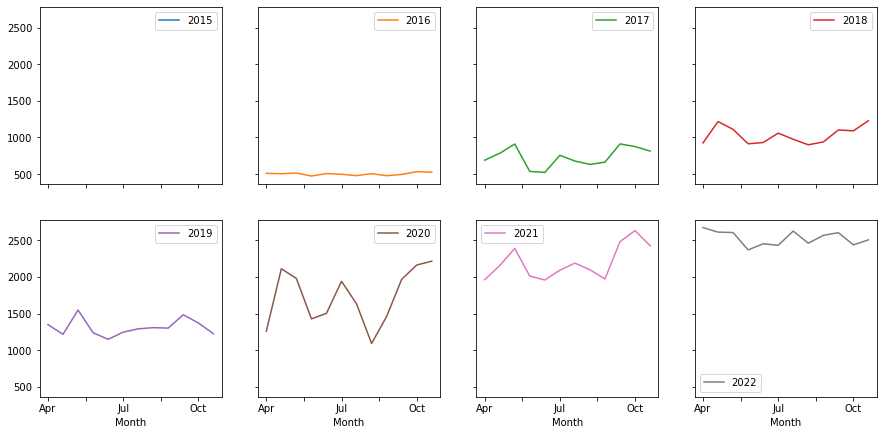

In [34]:
ReliancePivot.plot(subplots = True, figsize=(15, 15), layout=(4,4), sharey=True)
plt.show()

### Holts Winter

In [35]:
Holts_winter = Reliance.copy()

In [36]:
Holts_winter

,Date,Open,High,Low,Close,Volume,Year,Month,Daily_Gain
0,2015-12-01,477.474030,484.804535,476.111938,478.415100,5990904,2015,Dec,NaN
1,2015-12-02,478.588470,485.250305,477.721680,484.383514,3495228,2015,Dec,0.012475
2,2015-12-03,482.872833,489.831879,482.476593,484.012054,5243282,2015,Dec,-0.000767
3,2015-12-04,481.585052,483.516754,476.186218,478.192230,6204259,2015,Dec,-0.012024
4,2015-12-07,478.192230,481.931763,470.415924,471.555115,6684321,2015,Dec,-0.013880
...,...,...,...,...,...,...,...,...,...
1747,2022-12-26,2514.750000,2542.000000,2492.399902,2524.050049,2764496,2022,Dec,0.008732
1748,2022-12-27,2530.000000,2548.800049,2515.250000,2544.699951,2659749,2022,Dec,0.008181
1749,2022-12-28,2538.000000,2549.800049,2521.500000,2544.449951,3442509,2022,Dec,-0.000098
1750,2022-12-29,2527.000000,2548.899902,2525.500000,2543.300049,3198493,2022,Dec,-0.000452


In [37]:
Train =Holts_winter.iloc[:1652]
Test = Holts_winter.iloc[1652:]

In [38]:
len(Train)

1652

In [39]:
len(Test)

100

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots

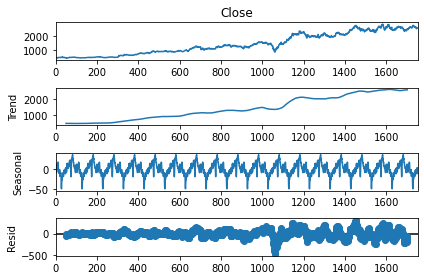

In [41]:
decompose_hw_add = seasonal_decompose(Holts_winter['Close'],period=100)
decompose_hw_add.plot()
plt.show()

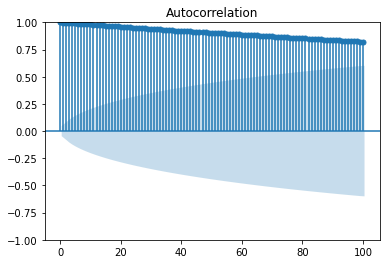

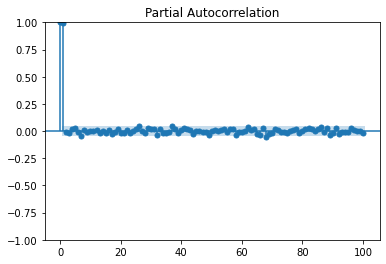

In [42]:
# ACF plots and PACF plots
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Holts_winter['Close'],lags=100)
tsa_plots.plot_pacf(Holts_winter['Close'],lags=100)
plt.show()


In [43]:
def RMSE_Value(forecast, actual):

    rmse_val = np.mean((forecast - actual)**2)**.5
    return(rmse_val)

In [44]:
def MAPE(forecast, actual):
    mape_val = np.mean(np.abs(forecast - actual)/np.abs(actual))

    return(mape_val)

In [45]:
Train.shape

(1652, 9)

In [46]:
Test.shape

(100, 9)

In [47]:
Test.Close.index[-1]

1751

In [48]:
### Simple Exponential Method
ses_model = SimpleExpSmoothing(Train.Close).fit(smoothing_level=1)
pred_ses = ses_model.predict(start = Test.Close.index[0],end = Test.Close.index[-1])
MAPE_ses_model=MAPE(pred_ses,Test.Close)
print("MAPE_ses_model:",MAPE_ses_model)
rmse_ses_model=RMSE_Value(pred_ses,Test.Close)
print("rmse_ses_model:",rmse_ses_model)


MAPE_ses_model: 0.02892923850357265
rmse_ses_model: 95.61293259265217


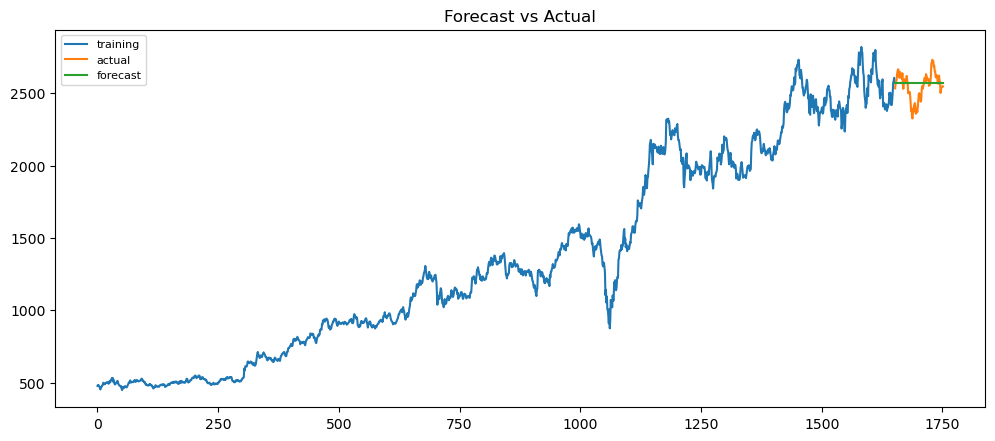

In [49]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train['Close'], label='training')
plt.plot(Test['Close'], label='actual')
plt.plot(pred_ses, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### Holts Method

In [50]:
# Holt method
hw_model = Holt(Train["Close"]).fit(smoothing_level=1, smoothing_slope=1)
pred_hw = hw_model.predict(start = Test.Close.index[0],end = Test.Close.index[-1])

MAPE_hw_model= MAPE(pred_hw,Test.Close)
print("MAPE_hw_model:",MAPE_hw_model)

rmse_hw_model = RMSE_Value(pred_hw,Test.Close)
print("rmse_hw_model:",rmse_hw_model)

MAPE_hw_model: 0.6713789879721871
rmse_hw_model: 1996.6788297546016


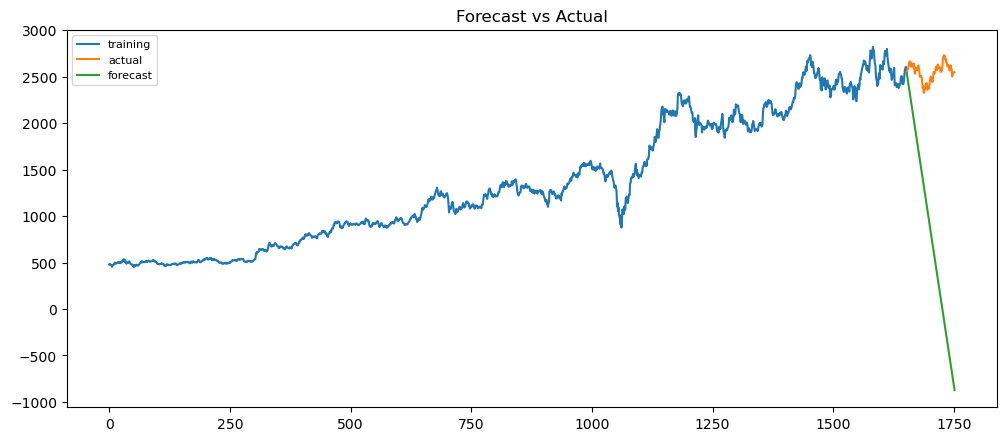

In [51]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train['Close'], label='training')
plt.plot(Test['Close'], label='actual')
plt.plot(pred_hw, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### Holts Winter ExponentialSmoothing additive Seasonality and additive Trend

In [52]:
hwe_model_add_add = ExponentialSmoothing(Train["Close"],seasonal="add",trend="add",seasonal_periods=100).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.Close.index[0],end = Test.Close.index[-1])
#mape value
MAPE_hwe_add_add_model=MAPE(pred_hwe_add_add,Test.Close)
print("MAPE_hwe_add_add_model:",MAPE_hwe_add_add_model)

#RMSE value
rmse_hwe_add_add_model = RMSE_Value(pred_hwe_add_add,Test.Close)
print("rmse_hwe_add_add_model:",rmse_hwe_add_add_model)

MAPE_hwe_add_add_model: 0.043375437810546674
rmse_hwe_add_add_model: 132.96635718237326


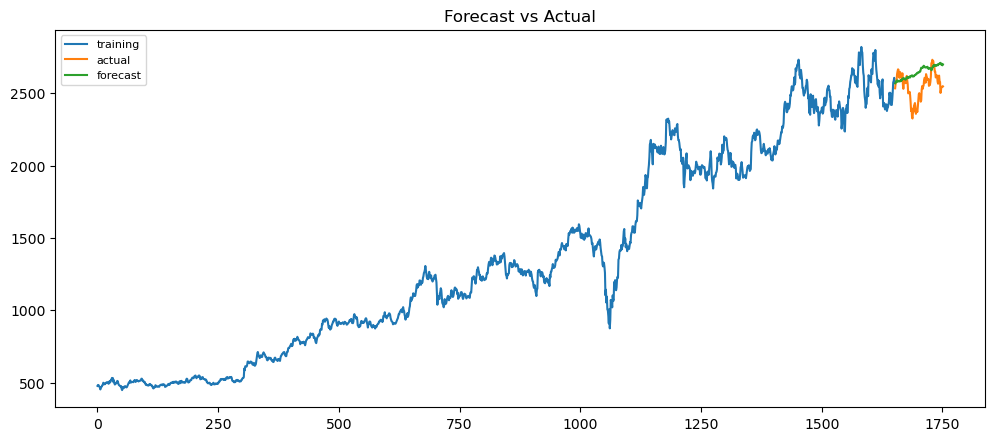

In [53]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train.Close, label='training')
plt.plot(Test.Close, label='actual')
plt.plot(pred_hwe_add_add, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### Holts Winter ExponentialSmoothing Multiplicative Seasonality and additive Trend

In [54]:
hwe_model_mul_add = ExponentialSmoothing(Train["Close"],seasonal="mul",trend="add",seasonal_periods=100).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.Close.index[0],end = Test.Close.index[-1])

MAPE_hwe_model_mul_add_model=MAPE(pred_hwe_mul_add,Test.Close)
print("MAPE_hwe_model_mul_add_model:",MAPE_hwe_model_mul_add_model)

#RMSE value
rmse_hwe_model_mul_add_model = RMSE_Value(pred_hwe_mul_add,Test.Close)
print("rmse_hwe_model_mul_add_model:",rmse_hwe_model_mul_add_model)

MAPE_hwe_model_mul_add_model: 0.03442959258726139
rmse_hwe_model_mul_add_model: 111.89066990288573


C:\Users\Pritam Paul\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



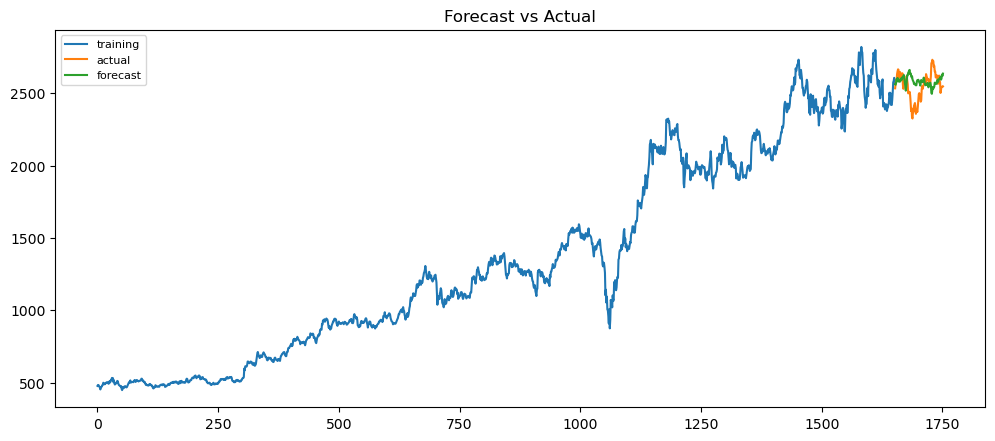

In [55]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train.Close, label='training')
plt.plot(Test.Close, label='actual')
plt.plot(pred_hwe_mul_add, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### Holts Winter ExponentialSmoothing Multiplicative Seasonality and Multiplicative Trend

In [56]:
hwe_model_mul_mul = ExponentialSmoothing(Train.Close,seasonal="mul",trend="mul",seasonal_periods=100).fit()
pred_hwe_mul_mul = hwe_model_mul_mul.predict(start = Test.Close.index[0],end = Test.Close.index[-1])
#MAPE Value
MAPE_hwe_model_mul_mul_model=MAPE(pred_hwe_mul_mul,Test.Close)
print("MAPE_hwe_model_mul_mul_model:",MAPE_hwe_model_mul_mul_model)

#RMSE value
rmse_hwe_model_mul_mul_model = RMSE_Value(pred_hwe_mul_mul,Test.Close)
print("rmse_hwe_model_mul_mul_model:",rmse_hwe_model_mul_mul_model)

MAPE_hwe_model_mul_mul_model: 0.21408820977416299
rmse_hwe_model_mul_mul_model: 618.6885108475067


C:\Users\Pritam Paul\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



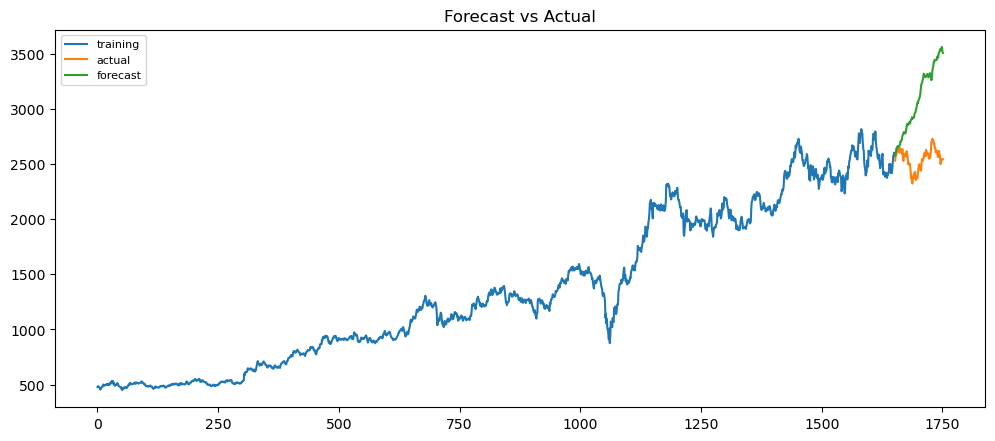

In [57]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train.Close, label='training')
plt.plot(Test.Close, label='actual')
plt.plot(pred_hwe_mul_mul, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### Comparing Models

In [58]:
compare_model = {"MODEL":pd.Series(["Single Exponential","Holts Winter","Holts winter exp add sea and add trend","Holts winter exp mul sea and add trend","Holts winter exp mul sea and mul trend"]),
                 "RMSE_Values" :pd.Series([rmse_ses_model,rmse_hw_model,rmse_hwe_add_add_model,rmse_hwe_model_mul_add_model,rmse_hwe_model_mul_mul_model]),
                 "MAPE_Values" :pd.Series([MAPE_ses_model,MAPE_hw_model,MAPE_hwe_add_add_model,MAPE_hwe_model_mul_add_model,MAPE_hwe_model_mul_mul_model])
                }
table_rmse=pd.DataFrame(compare_model)
table_rmse.sort_values(['MAPE_Values'])


,MODEL,RMSE_Values,MAPE_Values
0,Single Exponential,95.612933,0.028929
3,Holts winter exp mul sea and add trend,111.890670,0.034430
2,Holts winter exp add sea and add trend,132.966357,0.043375
4,Holts winter exp mul sea and mul trend,618.688511,0.214088
1,Holts Winter,1996.678830,0.671379


### Final Model by combining train and test

In [59]:
hwe_model_mul_mul = ExponentialSmoothing(Holts_winter.Close,seasonal="mul",trend="add",seasonal_periods=100).fit()

#Forecasting for next 30 time periods

hwe_model_mul_mul.forecast(30)

C:\Users\Pritam Paul\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



1752    2534.853279
1753    2537.086531
1754    2550.371855
1755    2573.167185
1756    2566.476139
1757    2588.812937
1758    2580.282111
1759    2569.397535
1760    2563.536258
1761    2567.645981
1762    2568.335402
1763    2583.882993
1764    2573.173897
1765    2584.462074
1766    2574.810946
1767    2594.338946
1768    2582.900333
1769    2581.994897
1770    2599.570954
1771    2586.562852
1772    2557.616163
1773    2540.426503
1774    2508.843156
1775    2534.525091
1776    2566.825837
1777    2599.565196
1778    2595.913449
1779    2601.914815
1780    2607.836204
1781    2618.395968
dtype: float64

## ARIMA

In [60]:
ari=Reliance4.copy()
ari = ari[ari.index >= '2015-12-01']
ari

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-01,477.474030,484.804535,476.111938,478.415100,5990904
2015-12-02,478.588470,485.250305,477.721680,484.383514,3495228
2015-12-03,482.872833,489.831879,482.476593,484.012054,5243282
2015-12-04,481.585052,483.516754,476.186218,478.192230,6204259
2015-12-07,478.192230,481.931763,470.415924,471.555115,6684321
...,...,...,...,...,...
2022-12-26,2514.750000,2542.000000,2492.399902,2524.050049,2764496
2022-12-27,2530.000000,2548.800049,2515.250000,2544.699951,2659749
2022-12-28,2538.000000,2549.800049,2521.500000,2544.449951,3442509


In [61]:
def stationarity(col):
    res = adfuller(col.dropna())
    print("Test Statistic:", res[0])
    print("P-Value:", res[1])
    if res[1] < 0.05:
        print("Stationary")
    else:
        print("Non-Stationary")

Test Statistic: -0.6168633260619576
P-Value: 0.86712589781231
Non-Stationary


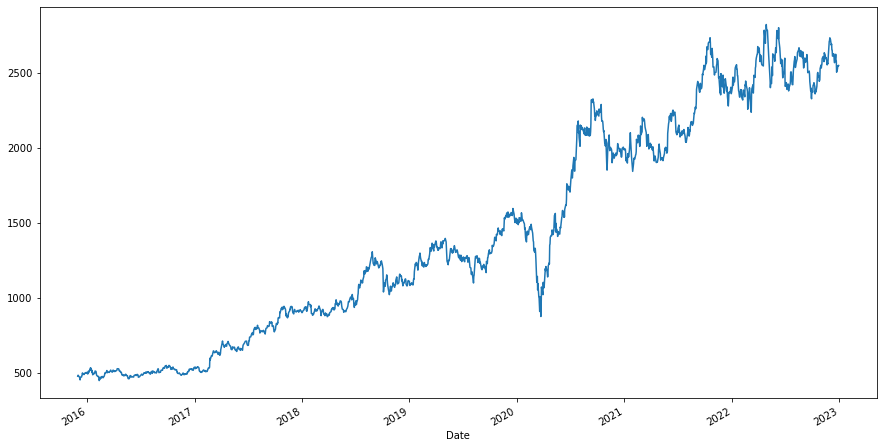

In [62]:
ari['Close'].plot(figsize=(15,8))

stationarity(ari['Close'])

Test Statistic: -22.012149219378305
P-Value: 0.0
Stationary


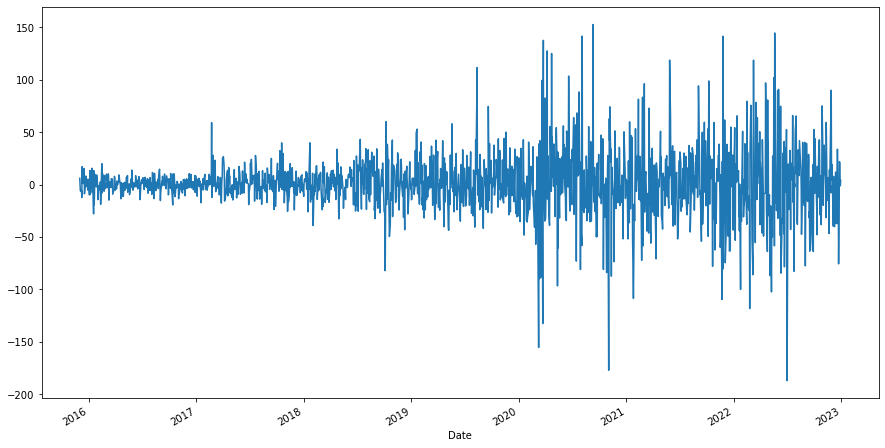

In [63]:
diff_1_close = ari['Close'].diff().dropna()
diff_1_close.plot(figsize=(15,8))

stationarity(diff_1_close)

In [64]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [65]:
def pacf(col):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
    ax1.plot(col)
    ax1.set_title('The Column Diff')
    plot_pacf(col, method='ywm', ax=ax2);


def acf(col):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
    ax1.plot(col)
    ax1.set_title('The Column Diff')
    plot_acf(col, ax=ax2);

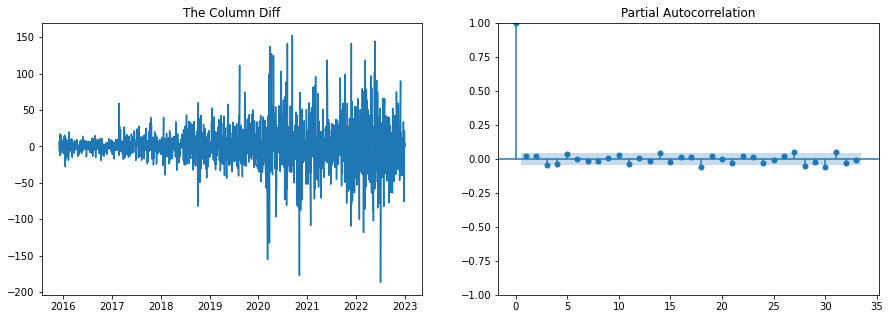

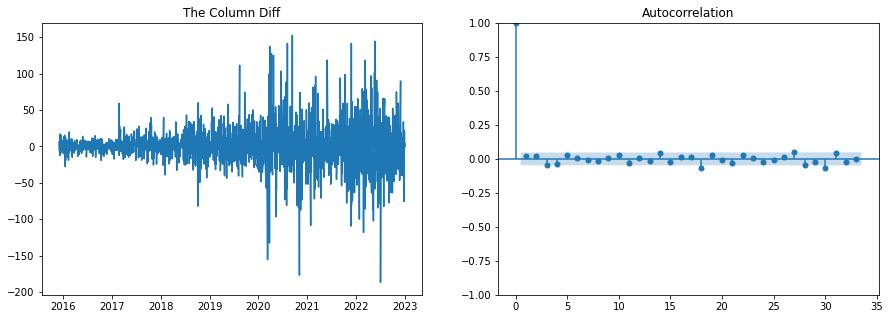

In [66]:
pacf(diff_1_close)
acf(diff_1_close)

In [67]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#import pmdarima as pm
from pmdarima.arima.utils import ndiffs


In [68]:
def arima_train_and_plot(data, col_name, Ntest, p, d, q):
    #split data to train and test sets based on N_test value
    train = data.iloc[:-Ntest]
    test = data.iloc[-Ntest:]
    train_idx = data.index <= train.index[-1]
    test_idx = data.index > train.index[-1]

    #Define and fit the arima model
    arima = ARIMA(train[col_name], order=(p,d,q))
    arima_res = arima.fit()

    #plot the real values of stock prices
    fig, ax= plt.subplots(figsize=(15,8))
    ax.plot(data[col_name], label='Actual return')

    #plot the fitted values of model (in sample data predicted values)
    train_pred = arima_res.fittedvalues
    ax.plot(train.index, train_pred, color='green', label='fitted')

    #plot the forecast values of model (out of sample data predicted values)
    prediction_res = arima_res.get_forecast(Ntest)
    conf_int = prediction_res.conf_int()
    #lower and upper limits of prediction
    lower, upper = conf_int[conf_int.columns[0]], conf_int[conf_int.columns[1]]
    forecast = prediction_res.predicted_mean
    ax.plot(test.index, forecast, label='forecast')
    ax.fill_between(test.index, lower, upper, color='red', alpha=0.3)
    ax.legend()

    #evaluating the model using RMSE and MAE metrics
    y_true = test[col_name].values
    ari_rmse = np.sqrt(mean_squared_error(y_true,forecast))
    ari_mae = mean_absolute_error(y_true,forecast)

    return ari_rmse, ari_mae

C:\Users\Pritam Paul\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Pritam Paul\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Pritam Paul\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Pritam Paul\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



Root Mean Squared Error:  66.04655829981557
Mean Absolute Error:  53.69334313333332


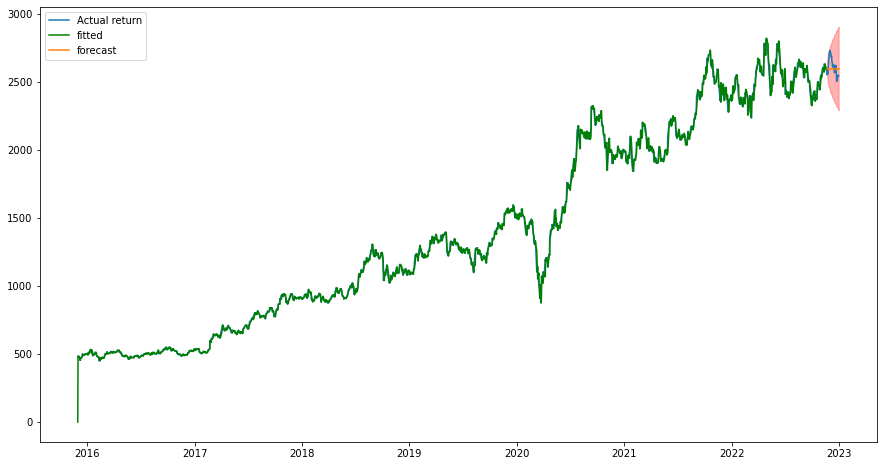

In [69]:
ari_rmse, ari_mae = arima_train_and_plot(ari, 'Close', Ntest=30, p=0, d=1, q=0)
print('Root Mean Squared Error: ', ari_rmse)
print('Mean Absolute Error: ', ari_mae)

In [70]:
#splitting the data to train and test sets based on Ntest value
#last 30 days
Ntest = 30
train = ari.iloc[:-Ntest]
test = ari.iloc[-Ntest:]
train_idx = ari.index <= train.index[-1]
test_idx = ari.index > train.index[-1]

#Define auto-arima to find best model
model = pm.auto_arima(train['Close'],
                      d = 1,
                      start_p = 0,
                      max_p = 10,
                      start_q = 0,
                      max_q = 10,
                      stepwise=False,
                      max_order=30,
                      trace=True)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=16431.230, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=16432.751, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=16433.905, Time=0.28 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=16433.037, Time=0.37 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=16431.931, Time=0.44 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=16432.203, Time=0.52 sec
 ARIMA(0,1,6)(0,0,0)[1] intercept   : AIC=16434.011, Time=0.58 sec
 ARIMA(0,1,7)(0,0,0)[1] intercept   : AIC=16435.893, Time=0.71 sec
 ARIMA(0,1,8)(0,0,0)[1] intercept   : AIC=16437.277, Time=0.89 sec
 ARIMA(0,1,9)(0,0,0)[1] intercept   : AIC=16439.205, Time=0.99 sec
 ARIMA(0,1,10)(0,0,0)[1] intercept   : AIC=16439.993, Time=1.04 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=16432.726, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=16435.219, Time=0.37 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=16435.322, Time=0.78 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=16433.916, Time=0.8

In [71]:
model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (2, 1, 2),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 1),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

In [72]:
def plot_result(model, data, col_name, Ntest):

    params = model.get_params()
    d = params['order'][1]

    #In sample data prediction
    train_pred = model.predict_in_sample(start=d, end=-1)
    #out of sample prediction
    test_pred, conf = model.predict(n_periods=Ntest, return_conf_int=True)

    #plotting real values, fitted values and prediction values
    fig, ax= plt.subplots(figsize=(15,8))
    ax.plot(data[col_name].index, data[col_name], label='Actual Values')
    ax.plot(train.index[d:], train_pred, color='lightgreen', label='Fitted Values')
    ax.plot(test.index, test_pred, label='Forecast Values')
    ax.fill_between(test.index, conf[:,0], conf[:,1], color='red', alpha=0.3)
    ax.legend()

    #evaluating the model using RMSE and MAE metrics
    y_true = test[col_name].values
    ari_rmse = np.sqrt(mean_squared_error(y_true,test_pred))
    ari_mae = mean_absolute_error(y_true,test_pred)

    return ari_rmse
    return ari_mae

C:\Users\Pritam Paul\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



Root Mean Squared Error:  70.95907406009886
Mean Absolute Error:  53.69334313333332


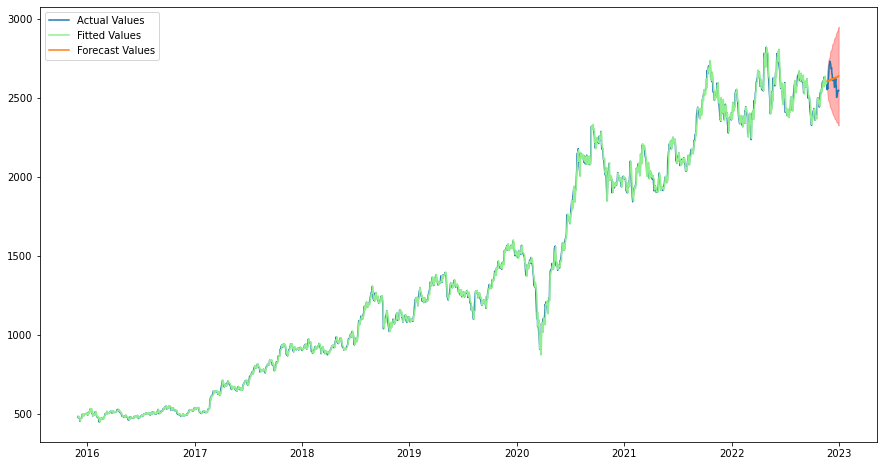

In [73]:
ari_rmse = plot_result(model, ari, 'Close', Ntest=30)
print('Root Mean Squared Error: ', ari_rmse)
print('Mean Absolute Error: ', ari_mae)

In [74]:
ari['log_close'] = np.log(ari['Close'])
ari.head()

,Open,High,Low,Close,Volume,log_close
Date,,,,,,
2015-12-01,477.474030,484.804535,476.111938,478.415100,5990904,6.170479
2015-12-02,478.588470,485.250305,477.721680,484.383514,3495228,6.182877
2015-12-03,482.872833,489.831879,482.476593,484.012054,5243282,6.182110
2015-12-04,481.585052,483.516754,476.186218,478.192230,6204259,6.170013
2015-12-07,478.192230,481.931763,470.415924,471.555115,6684321,6.156036


Test Statistic: -1.0847981383381062
P-Value: 0.7210960029228661
Non-Stationary


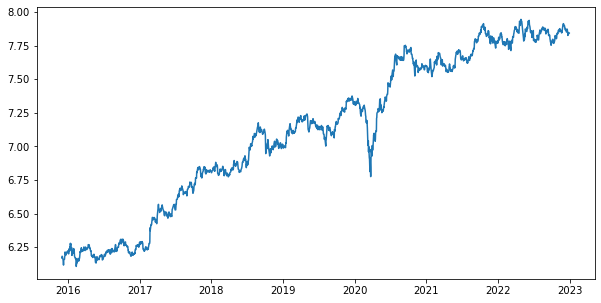

In [75]:
log_close = ari['log_close'].dropna()

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(log_close)

stationarity(log_close)

<AxesSubplot:xlabel='Date'>

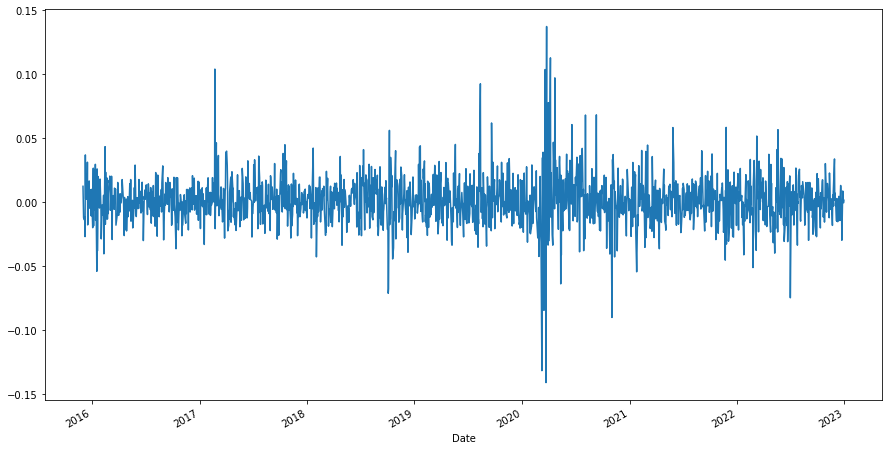

In [76]:
diff_1_logclose = ari['log_close'].diff().dropna()
diff_1_logclose.plot(figsize=(15,8))

Test Statistic: -12.648999039887208
P-Value: 1.3815203937949207e-23
Stationary


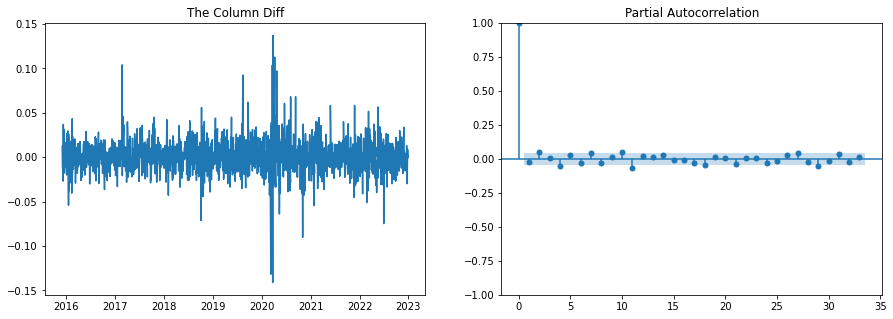

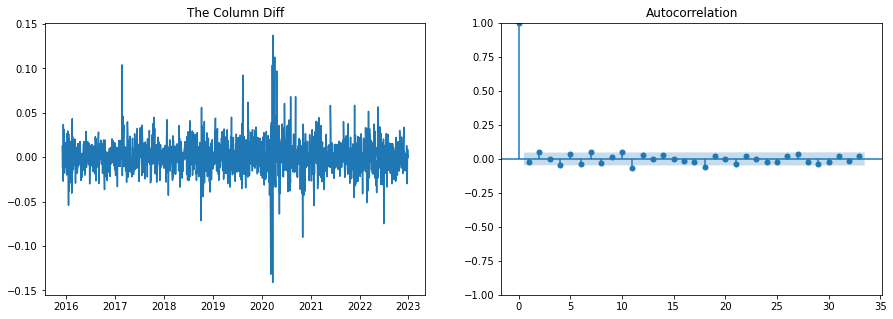

In [77]:
stationarity(diff_1_logclose)
pacf(diff_1_logclose)
acf(diff_1_logclose)

C:\Users\Pritam Paul\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Pritam Paul\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Pritam Paul\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Root Mean Squared Error:  0.02510773201715616
Mean Absolute Error:  0.020515088047497916


C:\Users\Pritam Paul\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



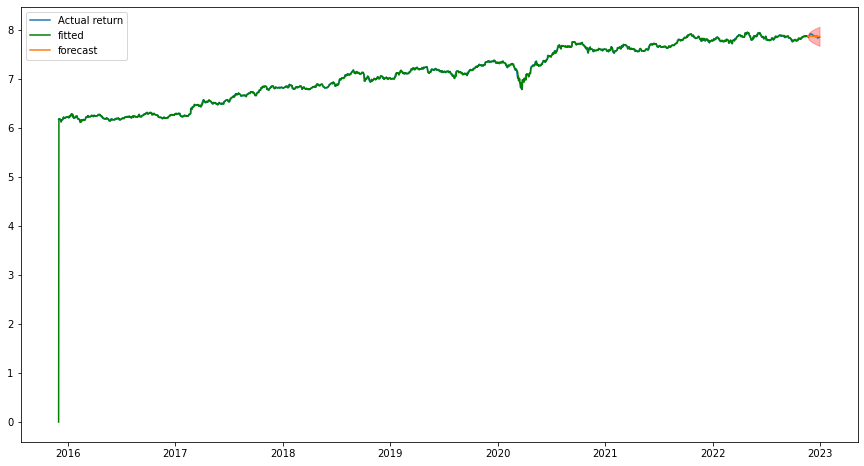

In [78]:
ari_rmse, ari_mae = arima_train_and_plot(ari, 'log_close', Ntest=30, p=1, d=1, q=1)
print('Root Mean Squared Error: ', ari_rmse)
print('Mean Absolute Error: ', ari_mae)

In [79]:

d_val = ndiffs(ari['log_close'], test='adf')
print('Arima D-value:', d_val)

Arima D-value: 1


In [80]:
#splitting the data to train and test sets based on Ntest value
#last 20 days
Ntest = 30
train = ari.iloc[:-Ntest]
test = ari.iloc[-Ntest:]
train_idx = ari.index <= train.index[-1]
test_idx = ari.index > train.index[-1]

#Define auto-arima to find best model
model = pm.auto_arima(train['log_close'],
                      d = d_val,
                      start_p = 1,
                      max_p = 10,
                      start_q = 1,
                      max_q = 10,
                      stepwise=False,
                      max_order=30,
                      trace=True)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=-8826.435, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=-8825.375, Time=0.39 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=-8827.795, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=-8825.844, Time=0.47 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=-8827.112, Time=0.56 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=-8826.749, Time=1.43 sec
 ARIMA(0,1,6)(0,0,0)[1] intercept   : AIC=-8825.955, Time=1.13 sec
 ARIMA(0,1,7)(0,0,0)[1] intercept   : AIC=-8826.847, Time=2.02 sec
 ARIMA(0,1,8)(0,0,0)[1] intercept   : AIC=-8826.501, Time=2.06 sec
 ARIMA(0,1,9)(0,0,0)[1] intercept   : AIC=-8825.659, Time=1.95 sec
 ARIMA(0,1,10)(0,0,0)[1] intercept   : AIC=-8827.495, Time=1.07 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=-8825.470, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=-8824.476, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=-8823.988, Time=0.26 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=-8823.836, Time=0.8

In [81]:
model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (3, 1, 2),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 1),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

Root Mean Squared Error:  0.03144776517894207
mean absolute error:  0.020515088047497916


C:\Users\Pritam Paul\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



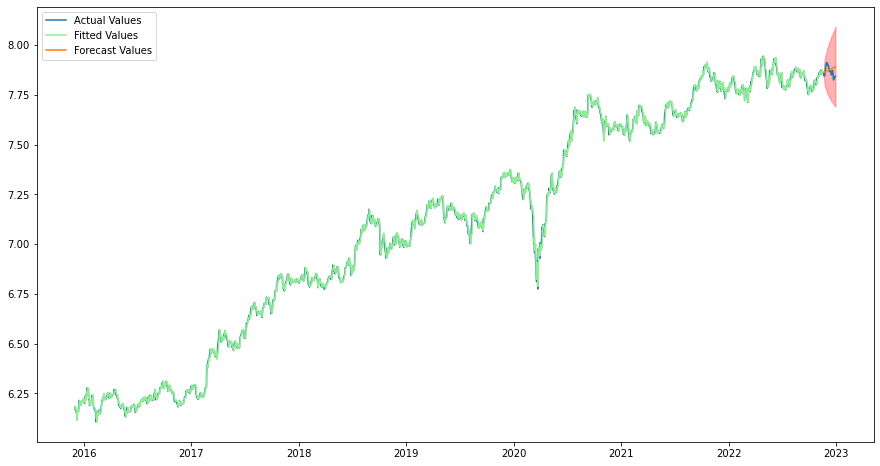

In [82]:
ari_rmse = plot_result(model, ari, 'log_close', Ntest=30)
print('Root Mean Squared Error: ', ari_rmse)
print('mean absolute error: ', ari_mae)

### Sarimax

In [83]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [84]:
def sarimax_train_and_plot(data, col_name, Nforecast, order, seasonal_order):
    train = data.iloc[:-Nforecast]
    test = data.iloc[-Nforecast:]

    model = SARIMAX(train[col_name],
                    order=order,
                    seasonal_order=seasonal_order,
                    enforce_stationarity=False,
                    enforce_invertibility=False)

    model_res = model.fit()

    fig, ax = plt.subplots(figsize=(15, 8))
    ax.plot(data[col_name], label='Actual return')
    train_pred = model_res.fittedvalues
    ax.plot(train.index, train_pred, color='green', label='Fitted')

    forecast = model_res.get_forecast(Nforecast)
    forecast_mean = forecast.predicted_mean
    conf_int = forecast.conf_int()
    lower, upper = conf_int.iloc[:, 0], conf_int.iloc[:, 1]

    ax.plot(test.index, forecast_mean, label='Forecast')
    ax.fill_between(test.index, lower, upper, color='red', alpha=0.3)
    ax.legend()

    # Plot forecasted values separately
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(test.index, forecast_mean, label='Forecast')
    ax.fill_between(test.index, lower, upper, color='red', alpha=0.3)
    ax.set_xlabel('Date')
    ax.set_ylabel('Forecasted Value')
    ax.set_title('SARIMAX Forecast')
    ax.legend()

    # Calculate RMSE and MAE
    y_true = test[col_name].values
    sari_rmse = np.sqrt(mean_squared_error(y_true, forecast_mean))
    sari_mae = mean_absolute_error(y_true, forecast_mean)

    return forecast_mean, sari_rmse, sari_mae

In [85]:
# Define SARIMAX order and seasonal order
order = (3, 1, 2)
seasonal_order = (3, 1, 2, 12)

Nforecast = 30

C:\Users\Pritam Paul\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Pritam Paul\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Pritam Paul\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Pritam Paul\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



Forecast: 1722    7.864853
1723    7.864391
1724    7.862820
1725    7.863092
1726    7.863253
1727    7.865295
1728    7.865327
1729    7.868795
1730    7.869354
1731    7.870581
1732    7.872436
1733    7.872113
1734    7.874548
1735    7.872518
1736    7.870002
1737    7.870902
1738    7.871079
1739    7.875542
1740    7.874137
1741    7.878053
1742    7.878433
1743    7.879063
1744    7.881604
1745    7.882174
1746    7.883941
1747    7.883321
1748    7.881717
1749    7.882892
1750    7.883219
1751    7.886489
Name: predicted_mean, dtype: float64
Root Mean Squared Error (SARIMAX): 0.02955101867183922
Mean Absolute Error (SARIMAX): 0.024794411643885537


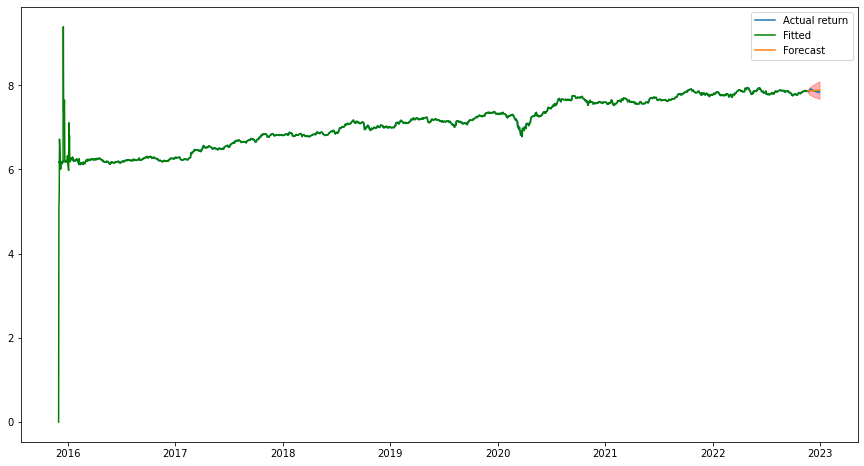

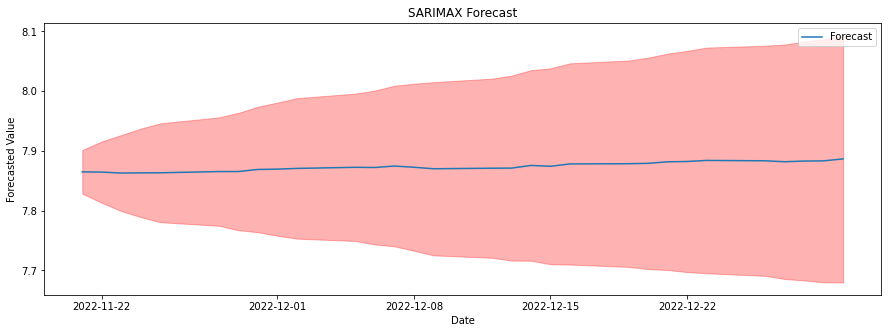

In [86]:
# Train and plot SARIMAX model and predict for next 30 days
forecast, sari_rmse, sari_mae = sarimax_train_and_plot(ari, 'log_close', Nforecast=Nforecast, order=order, seasonal_order=seasonal_order)
print('Forecast:', forecast)
print('Root Mean Squared Error (SARIMAX):', sari_rmse)
print('Mean Absolute Error (SARIMAX):', sari_mae)

In [87]:
compare_model = {"MODEL":pd.Series(["Single Exponential","Holts Winter","Holts winter exp add sea and add trend","Holts winter exp mul sea and add trend","Holts winter exp mul sea and mul trend","ARIMA(3,1,2)","Sarimax(3,1,2)"]),
                 "RMSE_Values" :pd.Series([rmse_ses_model,rmse_hw_model,rmse_hwe_add_add_model,rmse_hwe_model_mul_add_model,rmse_hwe_model_mul_mul_model,ari_rmse,sari_rmse]),
                 "MAPE_Values" :pd.Series([MAPE_ses_model,MAPE_hw_model,MAPE_hwe_add_add_model,MAPE_hwe_model_mul_add_model,MAPE_hwe_model_mul_mul_model,ari_mae,sari_mae])
                }
table_rmse=pd.DataFrame(compare_model)
table_rmse.sort_values(['MAPE_Values'])


,MODEL,RMSE_Values,MAPE_Values
5,"ARIMA(3,1,2)",0.031448,0.020515
6,"Sarimax(3,1,2)",0.029551,0.024794
0,Single Exponential,95.612933,0.028929
3,Holts winter exp mul sea and add trend,111.890670,0.034430
2,Holts winter exp add sea and add trend,132.966357,0.043375
4,Holts winter exp mul sea and mul trend,618.688511,0.214088
1,Holts Winter,1996.678830,0.671379


# Final model

In [88]:
final_holt = ExponentialSmoothing(Reliance.Close,seasonal="mul",trend="add",seasonal_periods=100).fit()

#Forecasting for next 30 time periods
#

C:\Users\Pritam Paul\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [89]:
forecast = final_holt.forecast(30)
forecast

1752    2534.853279
1753    2537.086531
1754    2550.371855
1755    2573.167185
1756    2566.476139
1757    2588.812937
1758    2580.282111
1759    2569.397535
1760    2563.536258
1761    2567.645981
1762    2568.335402
1763    2583.882993
1764    2573.173897
1765    2584.462074
1766    2574.810946
1767    2594.338946
1768    2582.900333
1769    2581.994897
1770    2599.570954
1771    2586.562852
1772    2557.616163
1773    2540.426503
1774    2508.843156
1775    2534.525091
1776    2566.825837
1777    2599.565196
1778    2595.913449
1779    2601.914815
1780    2607.836204
1781    2618.395968
dtype: float64

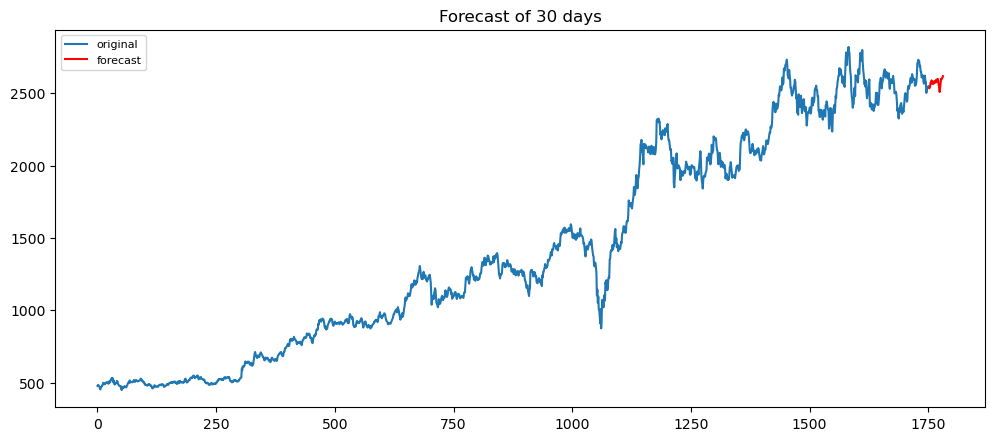

In [90]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Reliance.Close, label='original')
plt.plot(forecast, label='forecast',color='red')
plt.title('Forecast of 30 days')
plt.legend(loc='upper left', fontsize=8)
plt.show()